In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
# Load the CSV file
df=pd.read_csv(r'heart.csv')


In [9]:


# Identify the string columns
string_columns = df.select_dtypes(include=['object']).columns

# Create a LabelEncoder object for each string column
## This line caused the error:
#label_encoders[column] = LabelEncoder()

## Replace the above line with the following two lines:
label_encoders = {}
for column in string_columns:
    label_encoders[column] = LabelEncoder()

# Encode the string values in each column
for column in string_columns:
    df[column] = label_encoders[column].fit_transform(df[column])

# Split the data into features and target
#X = df.drop('Churn', axis=1)

#X=df.drop('customerID', axis=1)
X = df.drop(columns=['HeartDisease'])

y = df['HeartDisease']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)



# Create the logistic regression model
model = LogisticRegression(C=0.1)
"""
This code uses a regularization parameter of C=0.1. This means that the model will be penalized for having large coefficients.
"""
# Fit the model to the encoded data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = model.score(X_test, y_test)

# Calculate the confusion matrix
# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)


# Calculate the classification report
classification_report = classification_report(y_test, y_pred)

# Print the results
print('Accuracy:', accuracy)
print('Confusion matrix:\n', confusion_matrix)
print('Classification report:\n', classification_report)


Accuracy: 0.8608695652173913
Confusion matrix:
 [[ 91  17]
 [ 15 107]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       108
           1       0.86      0.88      0.87       122

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



D:\ImageClassification\imageclassification\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


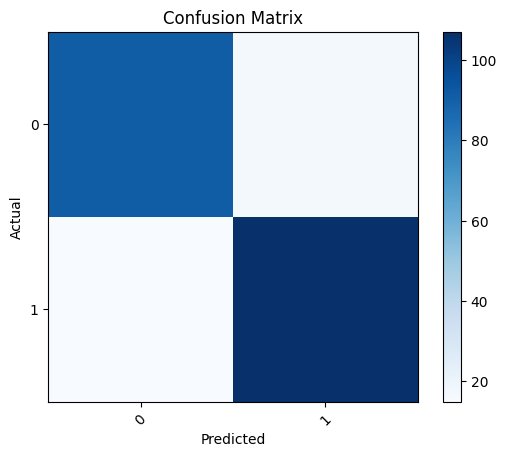

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix plot
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap='Blues')

# Add labels to the plot
plt.xticks(range(len(cm)), labels=df.HeartDisease.unique(), rotation=45)
plt.yticks(range(len(cm)), labels=df.HeartDisease.unique())

# Add a title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add a colorbar
plt.colorbar()

# Show the plot
plt.show()
